## **ANN Classification**

### Binary Classification

In [1]:
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense

# Load the dataset
tips = sns.load_dataset("tips")

# Preprocess the data
# Encoding categories
le = LabelEncoder()
tips['sex'] = le.fit_transform(tips['sex'])
tips['smoker'] = le.fit_transform(tips['smoker'])
tips['day'] = le.fit_transform(tips['day'])
tips['time'] = le.fit_transform(tips['time'])

# Create a binary target variable for bianry classification
median_bill = tips['total_bill'].median()
tips['high_bill'] = (tips['total_bill'] > median_bill).astype(int)

In [2]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,high_bill
0,16.99,1.01,0,0,2,0,2,0
1,10.34,1.66,1,0,2,0,3,0
2,21.01,3.50,1,0,2,0,3,1
3,23.68,3.31,1,0,2,0,2,1
4,24.59,3.61,0,0,2,0,4,1


In [2]:
# Load the dataset
tips_1 = sns.load_dataset("tips")
tips_1.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
tips.describe()

,total_bill,tip,sex,smoker,day,time,size,high_bill
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,0.643443,0.381148,1.741803,0.278689,2.569672,0.500000
std,8.902412,1.383638,0.479967,0.486667,0.926815,0.449276,0.951100,0.501028
min,3.070000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,13.347500,2.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,17.795000,2.900000,1.000000,0.000000,2.000000,0.000000,2.000000,0.500000
75%,24.127500,3.562500,1.000000,1.000000,3.000000,1.000000,3.000000,1.000000
max,50.810000,10.000000,1.000000,1.000000,3.000000,1.000000,6.000000,1.000000


In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,high_bill
0,16.99,1.01,0,0,2,0,2,0
1,10.34,1.66,1,0,2,0,3,0
2,21.01,3.50,1,0,2,0,3,1
3,23.68,3.31,1,0,2,0,2,1
4,24.59,3.61,0,0,2,0,4,1


In [3]:
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense

# Load the dataset
tips = sns.load_dataset("tips")

# Preprocess the data
# Encoding categories
le = LabelEncoder()
tips['sex'] = le.fit_transform(tips['sex'])
tips['smoker'] = le.fit_transform(tips['smoker'])
tips['day'] = le.fit_transform(tips['day'])
tips['time'] = le.fit_transform(tips['time'])

# Create a binary target variable for bianry classification
median_bill = tips['total_bill'].median()
tips['high_bill'] = (tips['total_bill'] > median_bill).astype(int)

# Split the data into training and test sets
X = tips.drop(['total_bill', 'high_bill'], axis=1)
y = tips['high_bill']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=[X_train.shape[1]]),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy: %.2f' % (accuracy*100))

Metal device set to: Apple M1 Max

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB

Epoch 1/10
7/7 [==============================] - 1s 35ms/step - loss: 0.7567 - accuracy: 0.4308
Epoch 2/10
7/7 [==============================] - 0s 13ms/step - loss: 0.7432 - accuracy: 0.4308
Epoch 3/10
7/7 [==============================] - 0s 12ms/step - loss: 0.7324 - accuracy: 0.4359
Epoch 4/10
7/7 [==============================] - 0s 12ms/step - loss: 0.7228 - accuracy: 0.4615
Epoch 5/10
7/7 [==============================] - 0s 11ms/step - loss: 0.7148 - accuracy: 0.4718
Epoch 6/10
7/7 [==============================] - 0s 12ms/step - loss: 0.7073 - accuracy: 0.5026
Epoch 7/10
7/7 [==============================] - 0s 13ms/step - loss: 0.7012 - accuracy: 0.5026
Epoch 8/10
7/7 [==============================] - 0s 12ms/step - loss: 0.6955 - accuracy: 0.5333
Epoch 9/10
7/7 [==============================] - 0s 13ms/step - loss: 0.6892 - accuracy: 0.5538
Epoch 10/10
2/2 [============================

### **Multiclass Classification**

In [6]:
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense

# Load the dataset
tips = sns.load_dataset("tips")

# Preprocess the data
# Encoding categories
le = LabelEncoder()
tips['sex'] = le.fit_transform(tips['sex'])
tips['smoker'] = le.fit_transform(tips['smoker'])
tips['day'] = le.fit_transform(tips['day'])
tips['time'] = le.fit_transform(tips['time'])


# Split the data into training and test sets
X = tips.drop(['day'], axis=1)
y = tips['day']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Building the model
# Build the neural network
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=[X_train.shape[1]]),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(y_train.unique().shape[0], activation='softmax')
])

# Compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) # see below for categorical_crossentropy

# Training the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy*100}')

Epoch 1/10
5/5 [==============================] - 3s 220ms/step - loss: 1.3307 - accuracy: 0.2949 - val_loss: 1.3366 - val_accuracy: 0.2564
Epoch 2/10
5/5 [==============================] - 0s 41ms/step - loss: 1.2835 - accuracy: 0.3718 - val_loss: 1.2908 - val_accuracy: 0.3077
Epoch 3/10
5/5 [==============================] - 0s 49ms/step - loss: 1.2420 - accuracy: 0.4679 - val_loss: 1.2524 - val_accuracy: 0.4872
Epoch 4/10
5/5 [==============================] - 0s 44ms/step - loss: 1.2060 - accuracy: 0.5128 - val_loss: 1.2178 - val_accuracy: 0.4615
Epoch 5/10
5/5 [==============================] - 0s 50ms/step - loss: 1.1738 - accuracy: 0.5513 - val_loss: 1.1850 - val_accuracy: 0.4872
Epoch 6/10
5/5 [==============================] - 0s 60ms/step - loss: 1.1417 - accuracy: 0.5769 - val_loss: 1.1559 - val_accuracy: 0.4872
Epoch 7/10
5/5 [==============================] - 1s 273ms/step - loss: 1.1119 - accuracy: 0.5962 - val_loss: 1.1266 - val_accuracy: 0.4872
Epoch 8/10
5/5 [=========

Epoch 1/50
5/5 [==============================] - 0s 20ms/step - loss: 0.9987 - accuracy: 0.6218 - val_loss: 1.0216 - val_accuracy: 0.6410
Epoch 2/50
5/5 [==============================] - 0s 15ms/step - loss: 0.9718 - accuracy: 0.6282 - val_loss: 0.9979 - val_accuracy: 0.6667
Epoch 3/50
5/5 [==============================] - 0s 18ms/step - loss: 0.9460 - accuracy: 0.6346 - val_loss: 0.9757 - val_accuracy: 0.6667
Epoch 4/50
5/5 [==============================] - 0s 14ms/step - loss: 0.9209 - accuracy: 0.6346 - val_loss: 0.9538 - val_accuracy: 0.6923
Epoch 5/50
5/5 [==============================] - 0s 14ms/step - loss: 0.8977 - accuracy: 0.6474 - val_loss: 0.9347 - val_accuracy: 0.6923
Epoch 6/50
5/5 [==============================] - 0s 14ms/step - loss: 0.8744 - accuracy: 0.6410 - val_loss: 0.9165 - val_accuracy: 0.7179
Epoch 7/50
5/5 [==============================] - 0s 14ms/step - loss: 0.8524 - accuracy: 0.6474 - val_loss: 0.9013 - val_accuracy: 0.7436
Epoch 8/50
5/5 [===========

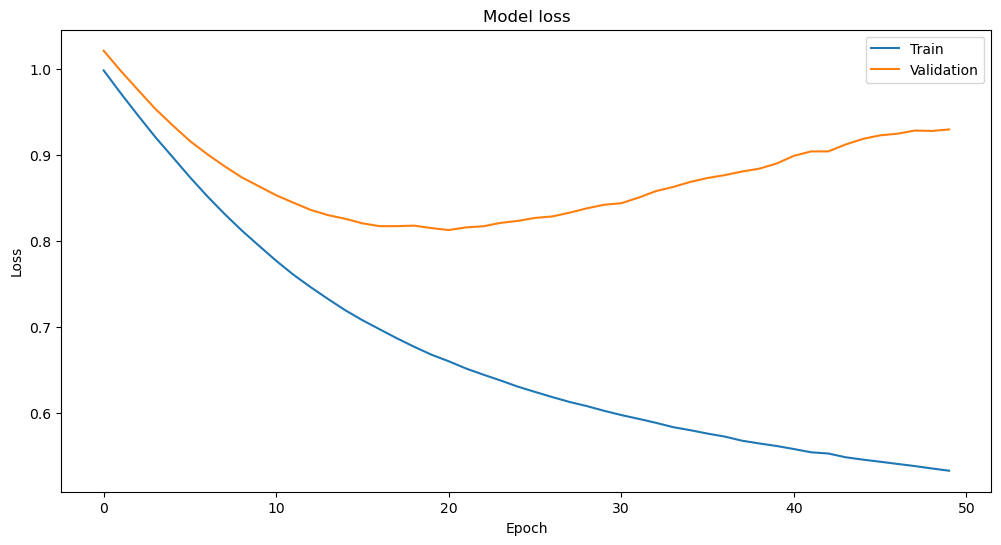

In [7]:
import matplotlib.pyplot as plt
# Train the model and store the history
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [8]:
from tensorflow.keras.utils import to_categorical

# Convert labels to categorical one-hot encoding
y_train_one_hot = to_categorical(y_train, num_classes=4)
y_test_one_hot = to_categorical(y_test, num_classes=4)

#compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Then use these one-hot encoded labels for training and evaluation
model.fit(X_train, y_train_one_hot, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_one_hot)
print(f'Accuracy: {accuracy*100}')

Epoch 1/10
5/5 [==============================] - 0s 56ms/step - loss: 0.5352 - accuracy: 0.7692 - val_loss: 0.9335 - val_accuracy: 0.6410
Epoch 2/10
5/5 [==============================] - 0s 20ms/step - loss: 0.5296 - accuracy: 0.7692 - val_loss: 0.9389 - val_accuracy: 0.6410
Epoch 3/10
5/5 [==============================] - 0s 20ms/step - loss: 0.5257 - accuracy: 0.7628 - val_loss: 0.9452 - val_accuracy: 0.6410
Epoch 4/10
5/5 [==============================] - 0s 21ms/step - loss: 0.5238 - accuracy: 0.7564 - val_loss: 0.9536 - val_accuracy: 0.6154
Epoch 5/10
5/5 [==============================] - 0s 19ms/step - loss: 0.5214 - accuracy: 0.7564 - val_loss: 0.9581 - val_accuracy: 0.6154
Epoch 6/10
5/5 [==============================] - 0s 19ms/step - loss: 0.5193 - accuracy: 0.7564 - val_loss: 0.9577 - val_accuracy: 0.6154
Epoch 7/10
5/5 [==============================] - 0s 19ms/step - loss: 0.5178 - accuracy: 0.7564 - val_loss: 0.9542 - val_accuracy: 0.6410
Epoch 8/10
5/5 [===========

Epoch 1/50
5/5 [==============================] - 0s 30ms/step - loss: 0.5086 - accuracy: 0.7564 - val_loss: 0.9740 - val_accuracy: 0.6154
Epoch 2/50
5/5 [==============================] - 0s 22ms/step - loss: 0.5070 - accuracy: 0.7564 - val_loss: 0.9797 - val_accuracy: 0.6154
Epoch 3/50
5/5 [==============================] - 0s 20ms/step - loss: 0.5051 - accuracy: 0.7564 - val_loss: 0.9819 - val_accuracy: 0.6154
Epoch 4/50
5/5 [==============================] - 0s 20ms/step - loss: 0.5029 - accuracy: 0.7564 - val_loss: 0.9836 - val_accuracy: 0.6154
Epoch 5/50
5/5 [==============================] - 0s 20ms/step - loss: 0.5018 - accuracy: 0.7564 - val_loss: 0.9868 - val_accuracy: 0.6154
Epoch 6/50
5/5 [==============================] - 0s 20ms/step - loss: 0.4998 - accuracy: 0.7564 - val_loss: 0.9901 - val_accuracy: 0.6154
Epoch 7/50
5/5 [==============================] - 0s 19ms/step - loss: 0.4984 - accuracy: 0.7628 - val_loss: 0.9945 - val_accuracy: 0.6154
Epoch 8/50
5/5 [===========

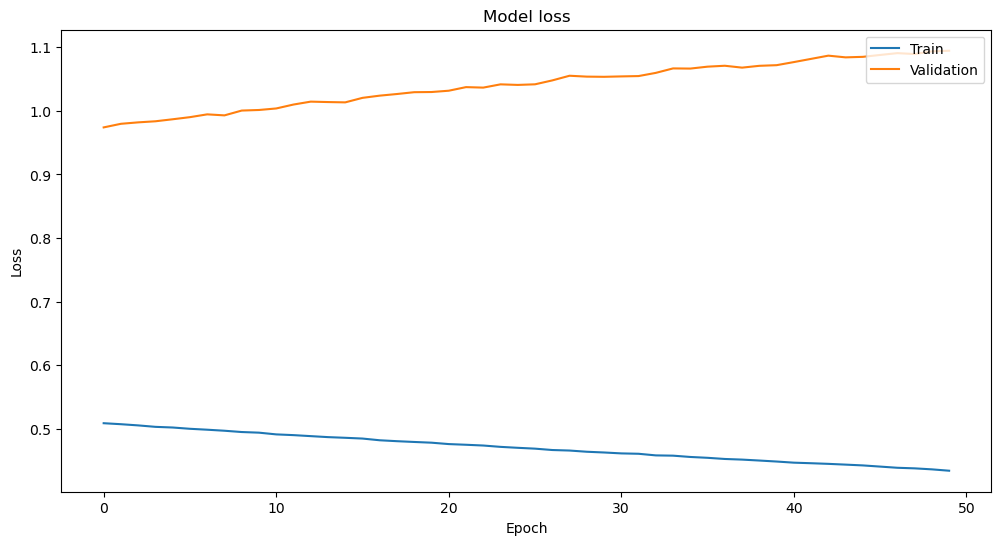

In [9]:
import matplotlib.pyplot as plt
# Train the model and store the history
history = model.fit(X_train, y_train_one_hot, epochs=50, batch_size=32, validation_split=0.2)

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()